# Plan of Action
1. Read the data and inspect
2. EDA - Univariate, Bi-Variate Analysis & Visualization
3. Data Preparation - Trim Data (Column and Rows with least info),Address Missing Values & outliers, Scaling, Dummification
4. Train & Test Split
5. Feature Scaling
6. Logistic Regression Model - RFE, Fine Tuning, Calculate Metrics - Accuracy
7. Conversion Probability for Train Data - Performance using ConfusiMetricson Matrix, ROC Curve, Recall, Precision, F1 Score etc 
8. Predict Conversion Probability for Test Data & Performance Assessment
9. Probability/ Conversion Score for each Lead

In [1]:
# Import libraries you need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Libraries for model build
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Libraries for Performance
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter("ignore")

# 1. Read Data & Inspect

In [2]:
leads = pd.read_csv('leads.csv')
leads.head()
leads_copy = leads.copy()

In [3]:
leads.shape

(9240, 37)

#### 9k+ records with 37 columns of data

In [4]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# Lets check for null value percentages by columns

(leads.isnull().sum()/len(leads) * 100).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Various columns with null/missing values observed. Need to be anlyzed further and treated

In [7]:
# Lets check for data imbalance through target variable

(leads.Converted.value_counts()/len(leads)).round(2)

0    0.61
1    0.39
Name: Converted, dtype: float64

#### There is data imbalance but not that huge: roughly 60:40 split

# 2. Exploratory Data Analysis

In [8]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Univariate Analysis

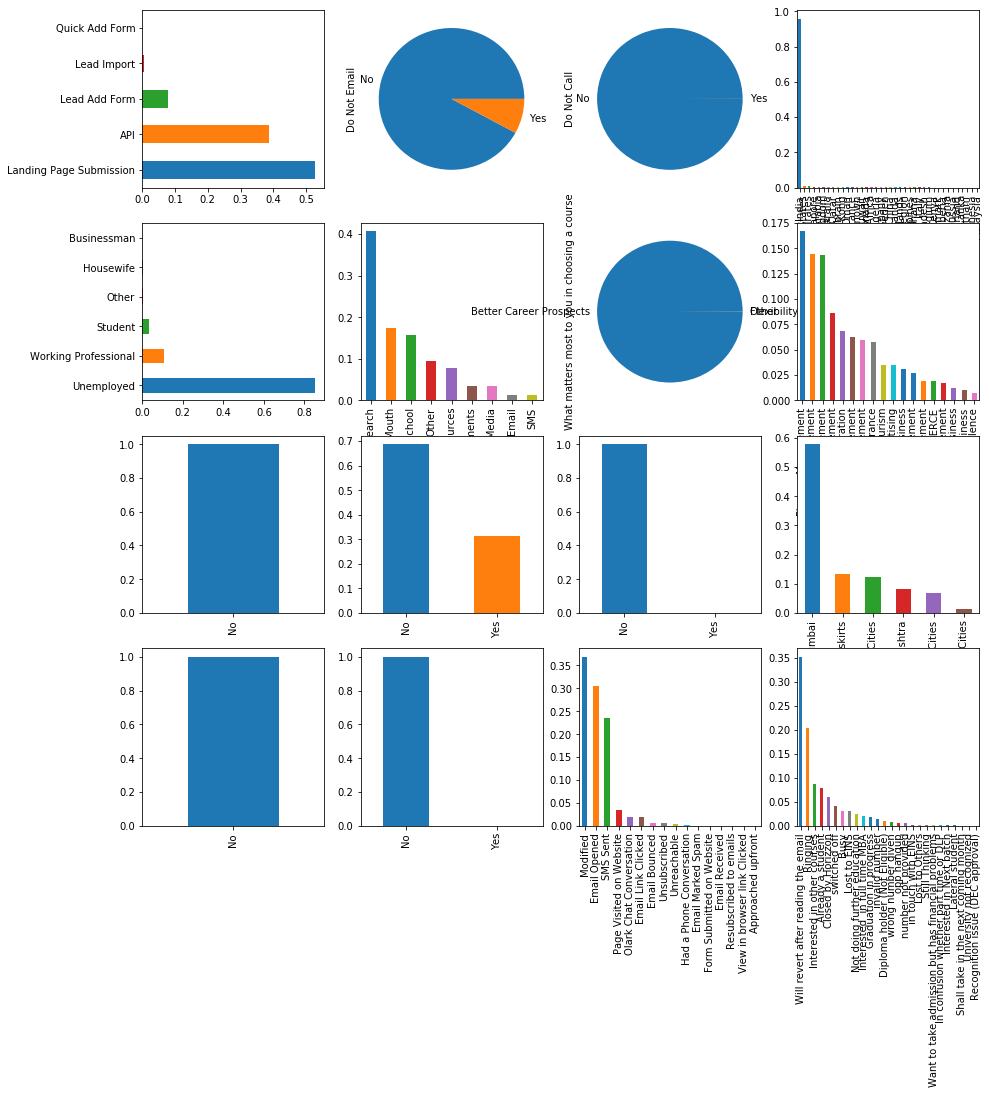

In [9]:
# Lets start with univariate Analysis
plt.figure(figsize=(15,15))
plt.subplot(441)
leads["Lead Origin"].value_counts(normalize=True).plot(kind='barh')
plt.subplot(442)
leads["Do Not Email"].value_counts(normalize=True).plot(kind='pie')
plt.subplot(443)
leads["Do Not Call"].value_counts(normalize=True).plot(kind='pie')
plt.subplot(444)
leads.Country.value_counts(normalize=True).plot(kind='bar')
`leads["What is your current occupation"].value_counts(normalize=True).plot(kind='barh')
plt.subplot(446)
leads[leads["How did you hear about X Education"]!="Select"]["How did you hear about X Education"].value_counts(normalize=True).plot.bar()
plt.subplot(447)
leads["What matters most to you in choosing a course"].value_counts(normalize=True).plot(kind='pie')
plt.subplot(448)
leads[leads.Specialization!="Select"].Specialization.value_counts(normalize=True).plot(kind='bar')
plt.subplot(449)
leads["I agree to pay the amount through cheque"].value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,10)
leads["A free copy of Mastering The Interview"].value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,11)
leads["Newspaper"].value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,12)
leads[leads.City!="Select"].City.value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,13)
leads["Magazine"].value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,14)
leads["X Education Forums"].value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,15)
leads["Last Notable Activity"].value_counts(normalize=True).plot(kind='bar')
plt.subplot(4,4,16)
leads["Tags"].value_counts(normalize=True).plot(kind='bar')

#### Observtions:
1. "Select" value seems to be used as a proxy for missing values. Could be observed in 'Specialization' & 'How did hear about X' columns - MNAR
2. Almost all learners seem to take up courses offered by X for "Better Career Prospects" - Highly Skewed Column
3. Courses offered by X seem to be popular amongst 'Unemployed' category
4. Almost all respondents did **not want pay through check** - skewed column
5. 'Online Search' emerges as popular channel and 'Landing Page' the popular lead source - which are correlated
6. Most of Learners come **from India!** out of the reamining, courses seem to be popular in USA and UAE - Skewed Column
7. Almost all of the Learners did not wanted to be contacted through phone or email - skewed Column

### Bi-variate Analysis

In [10]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

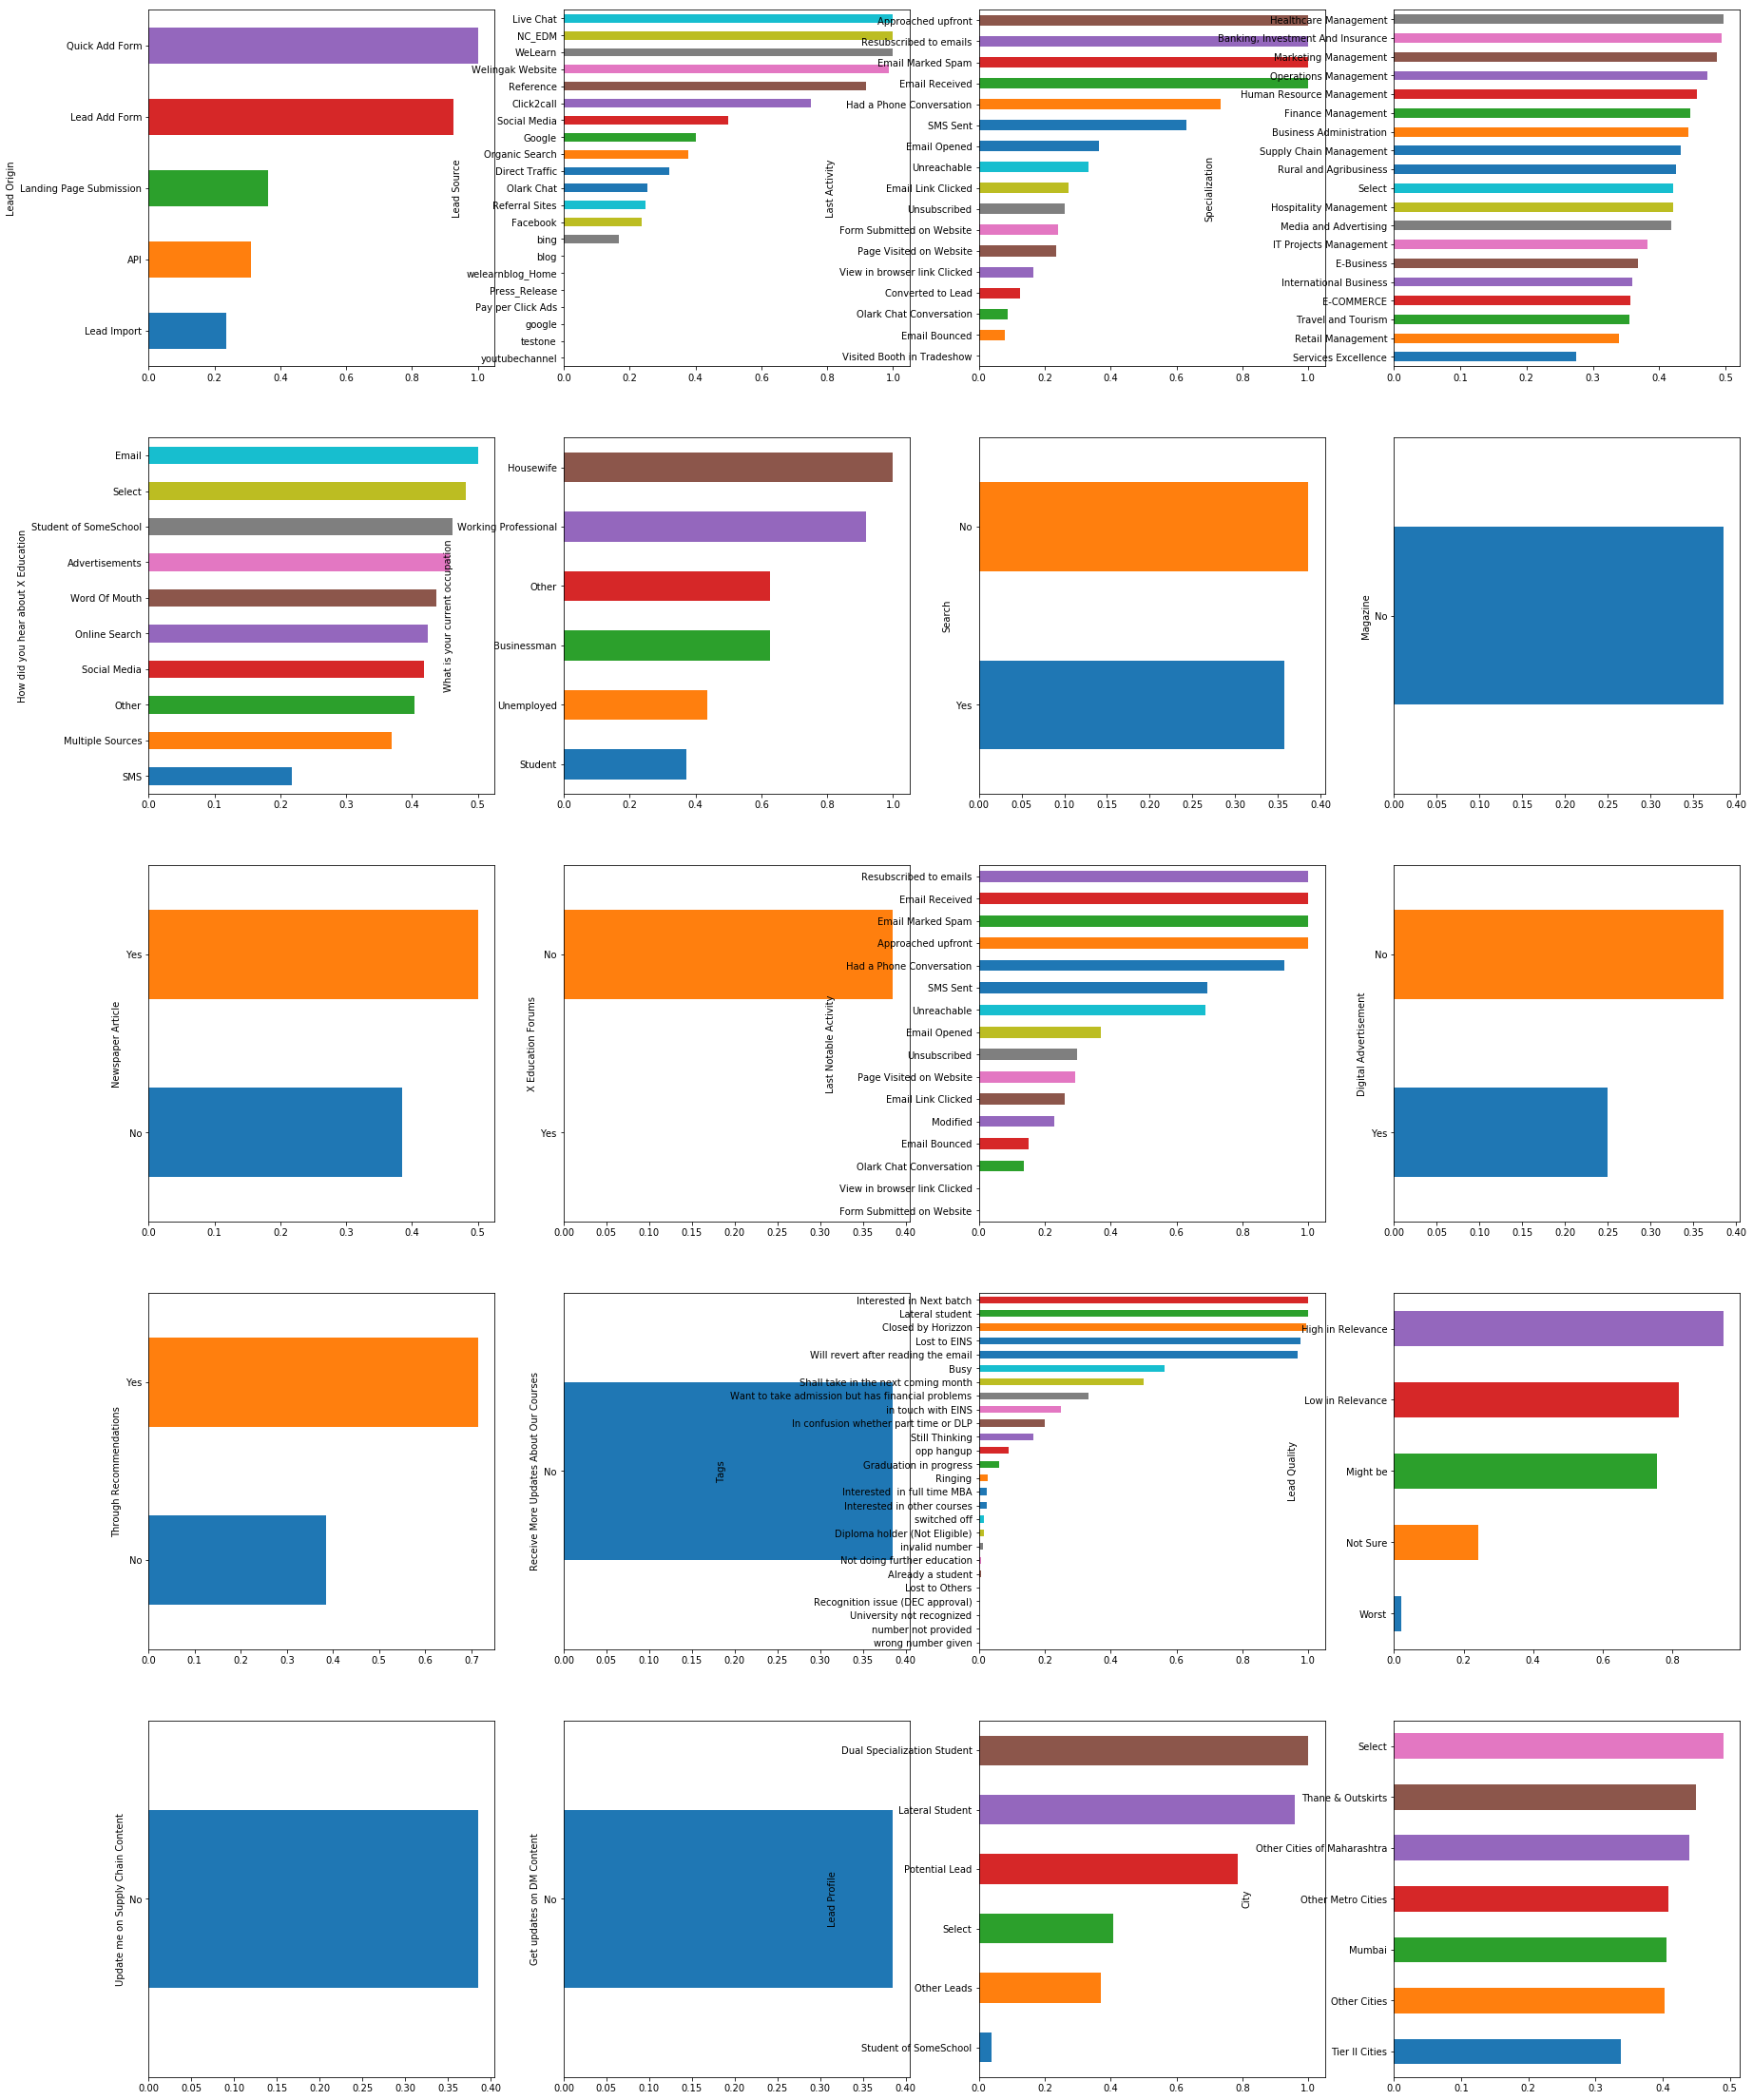

In [11]:
# Lets perform some bi-variate Analysis, analyze variables w.r,t 'Coverted' valriable

categorical_variables = ['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'How did you hear about X Education','What is your current occupation',
       'Search','Magazine','Newspaper Article', 'X Education Forums', 'Last Notable Activity',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City']

plt.figure(figsize = [30,40])
i=0
for col in categorical_variables:
    plt.subplot(5,4,i+1)
    leads.groupby(col)['Converted'].mean().sort_values().plot.barh()
    i=i+1

plt.show()

#### Observations:
- Lead Origins - Learners originated from 'Quick Add Form' & 'Lead Add Form' seem to have high conversation rate
- Lead Sources of 'WeLearn','LiveChat','NC-EDM' channels are yielding more converted learners
- nearly 50% of learners who heard about X through Email have converted
- Learners from Healthcare, Banking/Investment seem to be popular specialization where we see max convertions. No clear winner though
- Most of converted learners are House-wives or working professionals
- Out of the various channels, those 'Through Recommendations' & who saw 'Digital Ads' & 'Newspaper' is where we highest conversion percentage of learners
- Learners who said 'Interested in next batch','Lateral Student','Will revert after reading emails' & 'closed by horizzon' had a great chance of conversion
- Learners with lead quality of 'Not Sure' & 'Worst' had low conversion percentage
- Converted Learners do not seem to be interested in updates on Supply chain or DM content.
- Lead Profiles 'Dual Specialization' & 'Lateral Students' have a high chance of convertion
- Conversion rate relative low in Tier II cities, however even metro cities and Cities of MH dont have high conversations either
- Multiple Tags seem to be good indicators of Convertion
- Learners whose last activity was 'approach upfront','Re-subscribe to emails','Marked email spam' seemed to convert more often

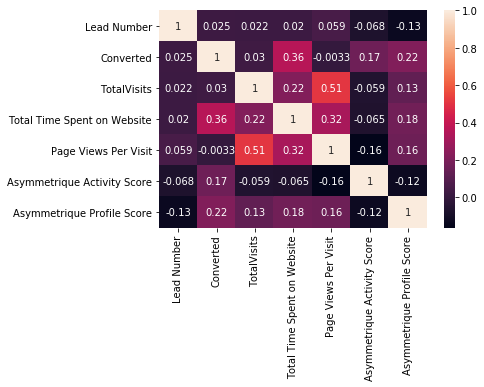

In [12]:
sns.heatmap(leads.corr(),annot=True)

#### At this stage, no prominent correlations observed in numeric variables w.r.t converted variable. We'll check again after dummicfication and scaling

In [13]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Observation:
- outliers can be obseved in 'TotalVisits','TotalTimeSpent' & 'PageViewsPerVisit' - We'll treat them shortly

# 3. Data Preparation

### Trim Data (Column and Rows with least info)

#### We Observed many 'Select' option in our analysis at multiple places - clearly its MNAR - should be treated as Null & then compute missing values % again

In [14]:
leads=leads.replace('Select',np.NaN)
((leads.isnull().sum()/len(leads))*100).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observation
- 'How did you hear about X Education' doesnt have any clear trends w.r.t 'Target' (deduced from EDA) and has 78% values missing - we can get rid of it
- Although Lead Profile has 74% missing values, it explained a lot of conversion - so lets analyze a bit more and take call later - I like the attribute for now

In [15]:
leads = leads.drop(['How did you hear about X Education'], axis=1)
leads.shape

(9240, 36)

#### We saw columns with same values for all records during EDA, their contribution to the analysis is neutral, so lets get rid of them

In [16]:
unique = leads.nunique()
unique = unique[unique.values == 1]
leads.drop(labels = list(unique.index), axis =1, inplace=True)
print("After dropping columns with same values in leads data we are left with",leads.shape ,"rows & columns.")

After dropping columns with same values in leads data we are left with (9240, 31) rows & columns.


In [17]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### Now Lets get rid of highly skewed columns - Observed during EDA

In [18]:
highly_skewed = ['Do Not Email','Do Not Call','What matters most to you in choosing a course',
                 'Newspaper','X Education Forums']

for col in highly_skewed:
    leads = leads.drop([col], axis=1)
    

print("After dropping Highly skewed columns in leads data we are left with",leads.shape ,"rows & columns.")

After dropping Highly skewed columns in leads data we are left with (9240, 26) rows & columns.


In [19]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### Lets get rid of columns used for customer Identification - Do not contribute in model build

In [20]:
identifiers = ['Prospect ID']

for col in identifiers:
    leads = leads.drop([col], axis=1)
    

print("After dropping customer idenfier columns in leads data we are left with",leads.shape ,"rows & columns.")

After dropping customer idenfier columns in leads data we are left with (9240, 25) rows & columns.


#### Columns 'Last Activity' & 'Last Notable Activity' seem to be synonymous interms of meaning - Lets analyze

In [21]:
check = leads[leads['Last Notable Activity']!="Modified"]
print(len(leads)-len(check))
dup_count=sum(check['Last Activity'].str.lower()==check['Last Notable Activity'].str.lower())
(dup_count/len(check))*100

3407


100.0

#### Except a special value 'Modified' in 'Last Notable Activity', its exactly same as 'Last Activity'. Further, value 'Modified' does not seem to driving conversion as per EDA. So lets delete the column

In [22]:
leads = leads.drop(['Last Notable Activity'], axis=1)
leads.shape

(9240, 24)

#### Lets remove columns with high % of missing values

In [23]:
null_percentage = ((leads.isnull().sum()/len(leads))*100).round(2)

# Collect column names with more than a particular percentage of null values
watermark = 45 # set the threshold value here
col_to_drop = list(leads.columns[null_percentage > watermark])

leads = leads[leads.columns[~leads.columns.isin(col_to_drop)]]
print("After dropping columns with null % > {0} we are left with {1} rows & columns.".format(watermark,leads.shape))

After dropping columns with null % > 45 we are left with (9240, 18) rows & columns.


#### Lets eliminate rows with 5 or more null values

In [24]:
row_null = (leads.isnull().sum(axis=1)).round(2)
eligible = row_null < 5
leads = leads[eligible]
print("After the steps of trimming data, we are left with ",leads.shape ,"rows & columns.")

After the steps of trimming data, we are left with  (8322, 18) rows & columns.


In [25]:
leads.isnull().mean().round(6)*100

Lead Number                                0.0000
Lead Origin                                0.0000
Lead Source                                0.2764
Converted                                  0.0000
TotalVisits                                0.6008
Total Time Spent on Website                0.0000
Page Views Per Visit                       0.6008
Last Activity                              0.4326
Country                                   18.5412
Specialization                            29.7525
What is your current occupation           22.3264
Search                                     0.0000
Newspaper Article                          0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Tags                                      30.0649
City                                      33.3333
A free copy of Mastering The Interview     0.0000
dtype: float64

### Address Missing Values & outliers

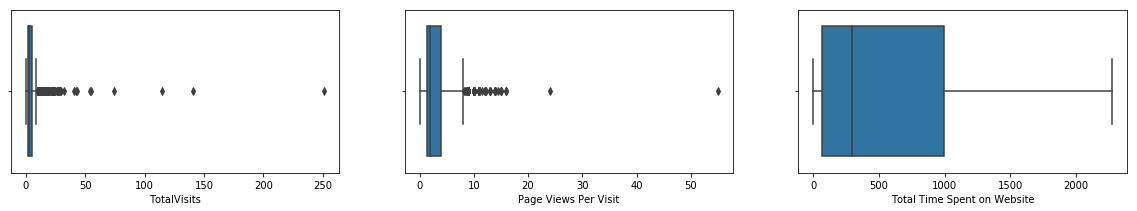

In [26]:
num_variables = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']

plt.figure(figsize = [20,3])
i=0
for col in num_variables:
    plt.subplot(1,3,i+1)
    sns.boxplot(leads[col])
    i=i+1

plt.show()

#### For TotalVisits & PageViewsPerVisit Lets replace missing values with median as the there is abrupt increase post 75th quartile

In [27]:
impute_col_with_median = ['TotalVisits','Page Views Per Visit']

for col in impute_col_with_median:
    leads[col] = leads[col].fillna(leads[col].median())

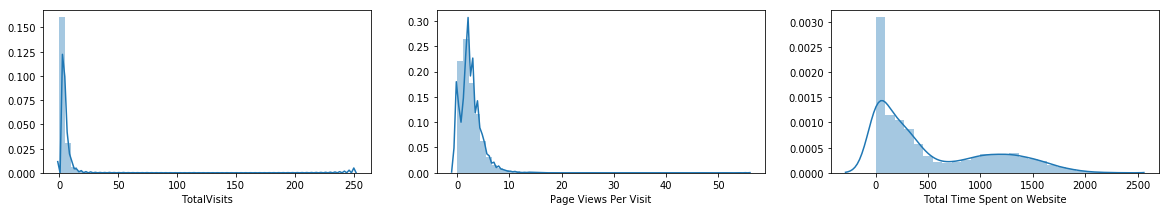

In [28]:
num_variables = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']

plt.figure(figsize = [20,3])
i=0
for col in num_variables:
    plt.subplot(1,3,i+1)
    sns.distplot(leads[col])
    i=i+1

plt.show()

#### lets check if we should cap these records based on these attributes or drop them

In [29]:
leads.TotalVisits.quantile([0.001,0.25,0.5,0.9, 0.999])

0.001     0.000
0.250     2.000
0.500     3.000
0.900     8.000
0.999    38.111
Name: TotalVisits, dtype: float64

In [30]:
leads["Page Views Per Visit"].quantile([0.001,0.25,0.5,0.9, 0.999])

0.001     0.0000
0.250     1.3300
0.500     2.0000
0.900     5.0000
0.999    14.8395
Name: Page Views Per Visit, dtype: float64

In [31]:
check2 = leads[leads["TotalVisits"] > 32]
len(check2)

9

In [32]:
check3 = leads[leads["Page Views Per Visit"] > 15]
len(check3)

5

In [33]:
leads['Total Time Spent on Website'].quantile([0.001,0.25,0.5,0.75,0.9,0.95,0.999])

0.001       0.000
0.250      68.000
0.500     295.000
0.750     994.750
0.900    1400.000
0.950    1576.950
0.999    2115.395
Name: Total Time Spent on Website, dtype: float64

#### From the above - We can cap above attributes at 99.9 percentile without loosing many records nor compromising with impact of outliers

In [34]:
num_cols = ['TotalVisits','Page Views Per Visit']

for col in num_cols:
    Q1 = leads[col].quantile(0.001)
    Q4 = leads[col].quantile(0.999)
    leads[col][leads[col]<=Q1]=Q1
    leads[col][leads[col]>=Q4]=Q4
    

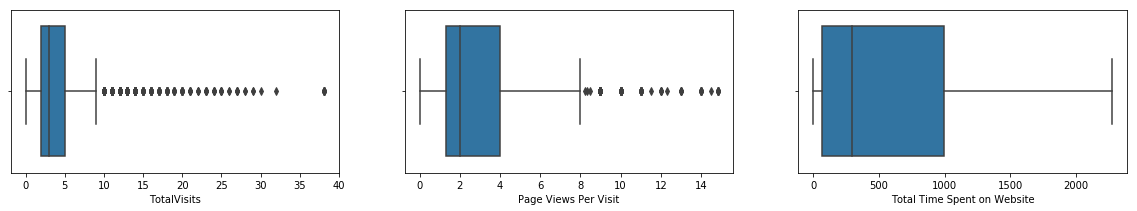

In [35]:
num_variables = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']

plt.figure(figsize = [20,3])
i=0
for col in num_variables:
    plt.subplot(1,3,i+1)
    sns.boxplot(leads[col])
    i=i+1

plt.show()

#### we will replace nulls with Mode / Popular choice for the categorical Values

In [36]:
leads.Tags.value_counts()

Will revert after reading the email                  2059
Ringing                                              1190
Interested in other courses                           512
Already a student                                     465
Closed by Horizzon                                    322
switched off                                          240
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

#### Impute Categorical Attributes with MODE. We have used direct value assignment with popular choice. Alternative would be to use leads[col].mode([0])

In [37]:
leads['Lead Source'] = leads['Lead Source'].fillna('Google')
leads['Last Activity'] = leads['Last Activity'].fillna('Email Opened')
leads['Specialization'] = leads['Specialization'].fillna('Finance Management')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')
leads['Tags'] = leads['Tags'].fillna('Will revert after reading the email')

#### For City
- we cant blindly use the popular choice 'Mumbai' for all as we can see impossible combinations city and country. Further data shows it has a quality issues with country != India
- We need to address them for meaningful insights

- **Need:** There is a need for us to retain geographical location information as that could represent brand 'X' popularity in particular region or target population (Learners). Since 'Country' is extremly skewed, lets use 'City'.

- **Assumption:** While without understanding the Web application form learners are filling out and the validations built into it, its hard to understand root cause for data quality issues. Hence we are making an **assumption that, a person cannot be wrong with CITY (Smaller/precise Unit compared to country) - as they are predominantly tailored to India (Other Cities & Other Metro Cities being generic options for other countries)**. So, we'll fill missing values for India with 'Mumbai' & 'Other Cities' for Country != India. We'll get rid of highly skewed column 'Country'

In [38]:
f1 = (leads.Country == 'India')
f2 = (leads.Country != 'India')

leads.loc[f1,'City'] = leads.loc[f1,'City'].fillna('Mumbai')
leads.loc[f2,'City'] = leads.loc[f2,'City'].fillna('Other Cities')

In [39]:
pd.pivot_table(leads,index=["City"],values=["TotalVisits"],aggfunc=[np.sum])

,sum
,TotalVisits
City,
Mumbai,20324.444
Other Cities,3416.222
Other Cities of Maharashtra,1851.000
Other Metro Cities,1678.000
Thane & Outskirts,3403.333
Tier II Cities,302.000


In [40]:
#### Now that City has been fixed, lets drop Country which is highly skewed attribute

leads = leads.drop(['Country'], axis=1)
leads.shape

(8322, 17)

In [41]:
leads.isnull().mean().round(6)*100

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [42]:
### After EDA & Data Preparation total number percentage of retaianed records are:

len(leads)/len(leads_copy)*100

90.06493506493507

### Encoding & Dummification

In [43]:
# List of variables to map

binary_var_list =  ['Search', 'Newspaper Article','Digital Advertisement','Through Recommendations',
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[binary_var_list] = leads[binary_var_list].apply(binary_map)

leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,0,0,0,0,Interested in other courses,Other Cities,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,0,0,0,0,Ringing,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,Will revert after reading the email,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,Ringing,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,0,0,0,0,Will revert after reading the email,Mumbai,0


### Dummification

In [44]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Specialization',
                               'What is your current occupation','Tags','City']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,0,0,0,0,Interested in other courses,Other Cities,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,0,0,0,0,Ringing,Mumbai,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,Will revert after reading the email,Mumbai,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,D

In [45]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                               'What is your current occupation','Tags','City'], 1)

leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Important Observation around Binning of Categorical Variables:
- We can perform Binning i.e merging of categorical variables values into a considated option to reduce the number of variables, But we are choosing not to do it for the following reasons:
    - We observation a good distribution of values contributing to target variable
    - We might loose information needed for model build
    - We have disadvantage of resulting in too many variables after dummification, but RFE and fine tuning using ViF will help us in handing them


# 4. Test - Train Split

In [46]:
X = leads.drop(['Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [47]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=75)

#### Split data into 70:30 train & test. Ensure repeatability using random_state

# 5. Feature Scaling

In [49]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])

In [50]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3326,-0.477310,1.674745,-0.285593,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8298,-0.750007,0.039538,-0.773856,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7912,-0.204612,-0.904481,0.202670,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4335,-1.022704,-0.968143,-1.262120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
884,1.431570,0.936264,3.132250,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [51]:
### Checking the Converted Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

41.32420091324201

#### Observation:
- Conversion rate of 41.3%. It is nearly 'balanced' (not exactly 50% though). So we'll not have to do any special treatment for this small imbalance in dataset

#### Lets look at correlation amongst features now

In [52]:
leads.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,1.000000,0.020493,0.022971,0.010135,0.050779,-0.013736,-0.013046,-0.018794,-0.006284,-0.123586,-0.092748,0.023762,0.083363,-0.158846,0.080363,0.136939,0.012660,-0.016090,-0.057877,-0.024460,0.015240,-0.016602,0.025295,0.177670,-0.000738,0.012111,0.002143,0.013541,0.015498,0.033315,-0.003639,0.006899,0.003910,0.012107,-0.053286,0.038120,-0.022240,0.118214,-0.018636,0.013752,0.006016,0.004422,0.009171,0.006173,-0.149575,0.076003,-0.003045,0.025966,0.015466,-0.011565,0.002882,-0.002229,0.058073,-0.006892,0.002958,-0.013035,-0.034828,-0.012936,-0.004171,-0.017121,-0.013068,-0.012812,0.025233,-0.023006,-0.021972,-0.006139,-0.012777,-0.015034,-0.033818,0.037929,-0.020746,0.021490,-0.007046,0.006782,-0.049776,-0.013363,-0.020583,-0.016595,0.068676,-0.014679,-0.007771,-0.011748,-0.034286,0.000569,-0.038055,-0.004374,-0.010557,-0.018412,-0.009454,0.097941,0.027340,-0.058655,-0.012721,-0.027950,-0.004271,-0.014823,-0.036023,-0.009114,-0.029582,0.024302,-0.042101
Converted,0.020493,1.000000,-0.021519,0.326694,-0.081213,-0.004677,0.002732,-0.007270,0.017738,-0.083787,-0.

# 6. Logistic Regression Model Build

#### Logistic Regression Model

In [53]:
logml = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5825
Model:                            GLM   Df Residuals:                     5729
Model Family:                Binomial   Df Model:                           95
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 01 Jun 2020   Deviance:                          nan
Time:                        23:22:26   Pearson chi2:                 4.14e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   7.246e+15   6.31e+07   1.15e+08      0.000    7.25e+15    7.25e+15
TotalVisits                                             1.007e+14   1.21e+06   8.34e+07      0.000    1.01e+14    1.01e+14
Total Time Spent on Website                             4.359e+14   1.01e+06    4.3e+08      0.000    4.36e+14    4.36e+14
Page Views Per Visit                                    -6.73e+13   1.31e+06  -5.14e+07      0.000   -6.73e+13   -6.73e+13
Search                                                 -7.913e+14   2.19e+07  -3.61e+07      0.000   -7.91e+14   -7.91e+14
Newspaper Article                                       1.185e+15   5.35e+07   2.21e+07      0.000    1.18e+15    1.18e+15
Digital Advertisement                                   8.398e+14   4.33e+07   1.94e+07      0.000     8.4e+14     8.4e+14
Through Recommendations                                 8.016e+13   2.79e+07   2.87e+06      0.000    8.02e+13    8.02e+13
A free copy of Mastering The Interview                 -4.418e+13   2.64e+06  -1.67e+07      0.000   -4.42e+13   -4.42e+13
Lead Origin_Landing Page Submission                    -3.139e+13   2.98e+06  -1.05e+07      0.000   -3.14e+13   -3.14e+13
Lead Origin_Lead Add Form                               4.795e+14   1.58e+07   3.03e+07      0.000     4.8e+14     4.8e+14
Lead Origin_Lead Import                                -2.286e+15   2.23e+07  -1.02e+08      0.000   -2.29e+15   -2.29e+15
Lead Source_Direct Traffic                             -5.059e+15    4.2e+07  -1.21e+08      0.000   -5.06e+15   -5.06e+15
Lead Source_Facebook                                   -2.286e+15   2.23e+07  -1.02e+08      0.000   -2.29e+15   -2.29e+15
Lead Source_Google                                     -4.919e+15   4.19e+07  -1.18e+08      0.000   -4.92e+15   -4.92e+15
Lead Source_Live Chat                                   1.755e+15   6.14e+07   2.86e+07      0.000    1.76e+15    1.76e+15
Lead Source_NC_EDM                                       175.4724   1.03e-06    1.7e+08      0.000     175.472     175.472
Lead Source_Olark Chat                                  -3.54e+15   4.22e+07  -8.39e+07      0.000   -3.54e+15   -3.54e+15
Lead Source_Organic Search                             -4.899e+15    4.2e+07  -1.17e+08      0.000    -4.9e+15    -4.9e+15
Lead Source_Pay per Click Ads                          -9.264e+15   7.93e+07  -1.17e+08      0.000   -9.26e+15   -9.26e+15
Lead Source_Press_Release                              -5.171e+15   6.35e+07  -8.14e+07      0.000   -5.17e+15   -5.17e+15
Lead Source_Reference                                  -4.728e+15   3.91e+07  -1.21e+08      0.000   -4.73e+15   -4.73e+15
Lead Source_Referral Sites                             -5.116e+15   4.25e+07   -1.2e+08

### Feature Selection Using RFE

In [54]:
logreg = LogisticRegression()

# Lets fit model with 20 Features
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 53),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 62),
 ('Search', False, 54),
 ('Newspaper Article', False, 70),
 ('Digital Advertisement', False, 59),
 ('Through Recommendations', False, 72),
 ('A free copy of Mastering The Interview', False, 76),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 68),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 67),
 ('Lead Source_NC_EDM', False, 83),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 81),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Reference', False, 47),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website'

In [57]:
#Significant features from RFE
sig_col = X_train.columns[rfe.support_]

In [58]:
#InSignificant features from RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received'

### Assessing the model with StatsModels

In [59]:
X_train_sm = X_train[sig_col]
X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5825
Model:                            GLM   Df Residuals:                     5809
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.9
Date:                Mon, 01 Jun 2020   Deviance:                       3977.7
Time:                        23:22:28   Pearson chi2:                 9.16e+03
No. Iterations:                    20   Covariance Type:             nonrobust
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                      

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                                             Features   VIF
2                        Lead Source_Welingak Website  1.26
8                             Tags_Closed by Horizzon  1.19
7                                           Tags_Busy  1.08
3                         Last Activity_Email Bounced  1.06
5             What is your current occupation_Student  1.04
11                                  Tags_Lost to EINS  1.04
9                       Tags_Interested in Next batch  1.00
10                               Tags_Lateral student  1.00
12  Tags_Want to take admission but has financial ...  1.00
14                            Tags_in touch with EINS  1.00
0                           Lead Origin_Lead Add Form  0.67
1                              Lead Source_Olark Chat  0.24
13           Tags_Will revert after reading the email  0.08
4                              Last Activity_SMS Sent  0.07
6          What is your current occupation_Unemployed  0.01


### Fine Tuning

In [61]:
# Lead Source_Welingak Website has high p value, lets drop it

X_train_sm = X_train_sm.drop(["Lead Source_Welingak Website"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5825
Model:                            GLM   Df Residuals:                     5810
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1991.2
Date:                Mon, 01 Jun 2020   Deviance:                       3982.4
Time:                        23:22:28   Pearson chi2:                 9.70e+03
No. Iterations:                    20   Covariance Type:             nonrobust
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                      

In [62]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                                             Features   VIF
7                             Tags_Closed by Horizzon  1.18
6                                           Tags_Busy  1.08
2                         Last Activity_Email Bounced  1.06
4             What is your current occupation_Student  1.04
10                                  Tags_Lost to EINS  1.04
8                       Tags_Interested in Next batch  1.00
9                                Tags_Lateral student  1.00
11  Tags_Want to take admission but has financial ...  1.00
13                            Tags_in touch with EINS  1.00
0                           Lead Origin_Lead Add Form  0.55
1                              Lead Source_Olark Chat  0.24
12           Tags_Will revert after reading the email  0.08
3                              Last Activity_SMS Sent  0.07
5          What is your current occupation_Unemployed  0.01


In [63]:
# Tags_Interested in Next batch has high p value, lets drop it

X_train_sm = X_train_sm.drop(['Tags_Interested in Next batch'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5825
Model:                            GLM   Df Residuals:                     5811
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.0
Date:                Mon, 01 Jun 2020   Deviance:                       4000.1
Time:                        23:22:28   Pearson chi2:                 9.56e+03
No. Iterations:                    19   Covariance Type:             nonrobust
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                      

In [64]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                                             Features   VIF
7                             Tags_Closed by Horizzon  1.18
6                                           Tags_Busy  1.08
2                         Last Activity_Email Bounced  1.06
4             What is your current occupation_Student  1.04
9                                   Tags_Lost to EINS  1.04
8                                Tags_Lateral student  1.00
10  Tags_Want to take admission but has financial ...  1.00
12                            Tags_in touch with EINS  1.00
0                           Lead Origin_Lead Add Form  0.55
1                              Lead Source_Olark Chat  0.24
11           Tags_Will revert after reading the email  0.08
3                              Last Activity_SMS Sent  0.07
5          What is your current occupation_Unemployed  0.01


In [65]:
# Tags_Lateral student has high p value, lets drop it

X_train_sm = X_train_sm.drop(['Tags_Lateral student'],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5825
Model:                            GLM   Df Residuals:                     5812
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2003.7
Date:                Mon, 01 Jun 2020   Deviance:                       4007.5
Time:                        23:22:28   Pearson chi2:                 9.60e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                      

In [66]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                                             Features   VIF
7                             Tags_Closed by Horizzon  1.18
6                                           Tags_Busy  1.08
2                         Last Activity_Email Bounced  1.06
4             What is your current occupation_Student  1.04
8                                   Tags_Lost to EINS  1.04
9   Tags_Want to take admission but has financial ...  1.00
11                            Tags_in touch with EINS  1.00
0                           Lead Origin_Lead Add Form  0.55
1                              Lead Source_Olark Chat  0.24
10           Tags_Will revert after reading the email  0.08
3                              Last Activity_SMS Sent  0.07
5          What is your current occupation_Unemployed  0.01


In [67]:
final_model_features = X_train_wo_const.columns

#### Observations:
- At this stage we have 12 features and all of coefficients, p value (<0.05) and VIF (<2) are in optimal range. Lets stop here and try to predict values and check for model performance
- We can see that major features contributing to Conversion (w.r.t coefficients) are 'Tags','Lead Origin' & 'Lead Source' in positive way and  'Current Occupation' & 'Last Action' in negative way
- 'Tags_Closed by Horizzon', 'Tags_Lost to EINS, 'Tags_Will revert after reading the email' features emerge as top contributors to the model

In [68]:
#Predicting values for train data

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.75437003, 0.01128436, 0.37307008, 0.99835693, 0.90348003,
       0.71366513, 0.99531463, 0.96643143, 0.89779759, 0.01128436])

### Creating a df with actual converted flag & predicted Conversion Probabilities

In [69]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadID
0,1,0.754370,3326
1,0,0.011284,8298
2,1,0.373070,7912
3,1,0.998357,4335
4,1,0.903480,884
5,1,0.713665,3001
6,1,0.995315,7588
7,1,0.966431,3765
8,1,0.897798,6127
9,0,0.011284,3281


### Lets create a new column 'predicted' with 1 if Converted_Prob > THRESHOLD else 0 (Based on Sample values - Statistical method of determining optimal cut off to be done later & this threshold would be revised)

In [70]:
THRESHOLD = 0.38 ########------- Set Your PROBABILITY SCORE THRESHOLD for Test & Train here-------########

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > THRESHOLD else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,1,0.754370,3326,1
1,0,0.011284,8298,0
2,1,0.373070,7912,0
3,1,0.998357,4335,1
4,1,0.903480,884,1


### Confusion Matrix

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3054  347]
 [ 581 1843]]


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))

0.84


# 7. Metrics beyond simply accuracy - Performance Evaluation for Train Data

In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity / Recall / True Positive Rate

In [74]:
Recall = TP / float(TP+FN)
print(Recall.round(2))

0.76


#### Specificity

In [75]:
print((TN / float(TN+FP)).round(2))

0.9


#### False Positive Rate / Inverted Specificity

In [76]:
print((FP/ float(TN+FP)).round(2))

0.1


#### Precision or Positive Predictive Value

In [77]:
Precision = TP / float(TP+FP)
print (Precision.round(2))

0.84


#### Negative Predictive Rate

In [78]:
print ((TN / float(TN+ FN)).round(2))

0.84


#### F1 Score

In [79]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print(F1.round(2))

0.8


## ROC Curve

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Lead Conversion')
    plt.legend(loc="lower right")
    plt.show()

    return None

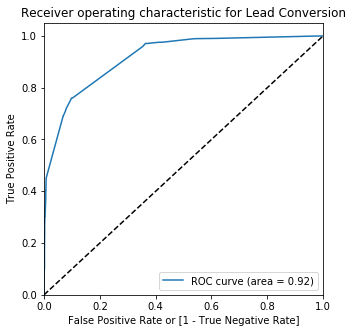

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Observations:
- Area under ROC curve(AUC) is 0.92 which is good outcome! It shows the 'skill of classifying a sample correctly' by the model. Curve touching top left corner shows how well the decision boundary between True Positive & False Negative is handled. 
- Overall Accuracy of 84% represents the model prediction matches that actual Convertion 84 out of 100 times (both positive & negative Conversions)
- False positive Rate of 10%, shows only 10 out of 100 times the model classifies as Learners are converting while they are not actually converting
- True positives and True Negatives are predicted by the Model with 84% accuracy 
- 90% Specificity implies, model 90 out of 100 times correctly identifies learners who wont convert
- 76% Sensitivity implies, model 76 out of 100 times correctly identifies learners who will convert

#### Important Note:
- probability threshold of 0.38 to 0.43 yield sensitivity of 76%, overall accuracy of 84% and F1 score of 80% & Specificity of 90%
- Tweaking this threshold to 0.37, yields sensitivity of 96%, overall accuracy of 78% and F1 score of 78% but poor precision of 66%
- Its Evident that there are huge number of data points between this decision boundaries which make the performance of model swing abruptly
- This model for given dataset gives a distinct decision boundary (demonstrated at the end of this analysis)
- We could tweak threshold, based on business goal and various sceanrios i.e 
    - if our goal is to identify hot leads accurately we need a lower threshold so that sensitivity is high
    - if our goal is identify & address non-converting leads through target ads, consultation & business offers, choose threshold > 0.38 so that specificity is higher
    

**Considering the Business goal of this exercise ‘being able to identify hot leads accurately’ – we are choosing a restrictive threshold of 0.37 which gives us sensitivity of 96%**

# Finding Optimal Cutoff Point

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.754370,3326,1,1,1,1,1,1,1,1,1,0,0
1,0,0.011284,8298,0,1,0,0,0,0,0,0,0,0,0
2,1,0.373070,7912,0,1,1,1,1,0,0,0,0,0,0
3,1,0.998357,4335,1,1,1,1,1,1,1,1,1,1,1
4,1,0.903480,884,1,1,1,1,1,1,1,1,1,1,1


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.416137     1.000000     0.000000
0.1          0.1  0.762232     0.973185     0.611879
0.2          0.2  0.774764     0.971122     0.634813
0.3          0.3  0.775794     0.970710     0.636872
0.4          0.4  0.840687     0.760314     0.897971
0.5          0.5  0.842575     0.759488     0.901794
0.6          0.6  0.836910     0.719059     0.920906
0.7          0.7  0.834850     0.711221     0.922964
0.8          0.8  0.767039     0.450908     0.992355
0.9          0.9  0.733734     0.368399     0.994119


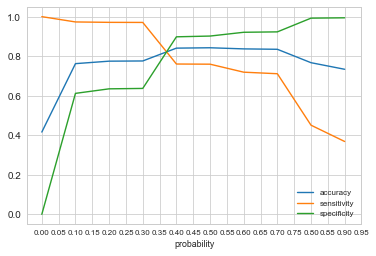

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
sns.set_context('paper')
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=10)
plt.show()

#### From the above, probability score of 0.37 seems to be the optimal value!! (Which isnt very far from our initial estimate of 0.4)

### Precision and recall tradeoff

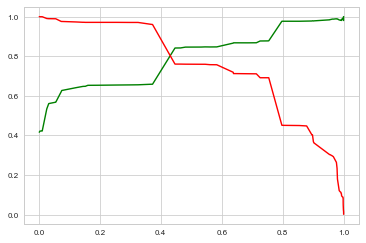

In [85]:
y_train_pred_final.Converted, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Obsrevation 
- The precision - Recall trade off chart shows the skill of an model in-terms predicting values correctly for an imbalanced data set. We have observed that there is roughly an 60-40 split in convertion or convertion rate of ~40%
- We can see that per this chart, optimal conversion probability threshold for this imbalanced data set could be 0.42
- Based on trial and error method of tweaking threshold, we observe that performance metrics for this model reamin same between 0.37 and 0.43

# 8. Evaluating Performance with Test Data

In [86]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits',
                                                                                      'Total Time Spent on Website',
                                                                                             'Page Views Per Visit']])

In [87]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5562,-1.022704,-0.968143,-1.262120,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
299,-0.204612,0.492448,-0.285593,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6798,-0.750007,-0.269679,-0.773856,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5583,-0.477310,-0.873559,-0.285593,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6973,0.068085,0.352391,0.690933,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [88]:
final_model_features

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS'],
      dtype='object')

In [89]:
# Choose features based on which model has been built
X_test = X_test[final_model_features]
# Add constant
X_test_sm = sm.add_constant(X_test)
# Predict
y_test_pred = res.predict(X_test_sm)

In [90]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

y_test_df['LeadID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [91]:
y_pred_final.head()

,Converted,LeadID,0
0,1,5562,0.991295
1,1,299,0.897798
2,0,6798,0.075240
3,0,5583,0.011284
4,0,6973,0.754370


In [92]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [93]:
y_pred_final = y_pred_final.reindex(columns=['LeadID','Converted','Converted_Prob'])

#### Conversion Prediction based on same THRESHOLD

In [94]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > THRESHOLD else 0)

In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8346015218261914

In [96]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1327,  155],
       [ 258,  757]], dtype=int64)

In [97]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Recall or Sensitivity

In [98]:
Recall = TP / float(TP+FN)
print(Recall.round(2))

0.75


#### Specificity

In [99]:
print((TN / float(TN+FP)).round(2))

0.9


#### False Positive Rate

In [100]:
print((FP/ float(TN+FP)).round(2))

0.1


#### Precision or Positive Predictive Value

In [101]:
Precision = TP / float(TP+FP)
print(Precision.round(2))

0.83


#### Negative Predictive Rate

In [102]:
print((TN / float(TN+ FN)).round(2))

0.84


#### F1 Score

In [103]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print(F1.round(2))

0.79


# 9. Conversion Probability/Score for each Lead

#### Ideally it makes sense to calculate 'Lead Score' for train dataset. But nothing wrong in doing it for entire dataset

In [104]:
# Our beloved leads data
leads.shape

(8322, 101)

In [105]:
# Scale numerical variables
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(leads[['TotalVisits',
                                                                                                  'Total Time Spent on Website',
                                                                                                  'Page Views Per Visit']])

In [106]:
# Prepare to feed it into model
leads_sm = leads[final_model_features]
# Add constants
leads_sm = sm.add_constant(leads_sm)
# Predict conversion probability
leads_pred = res.predict(leads_sm)
# Convert to df
y_pred_1 = pd.DataFrame(leads_pred)
# Concatinate probability scores with leads data
leads_pred_final = pd.concat([leads, y_pred_1],axis=1)
# Rename column
leads_pred_final.rename(columns = {0:'Lead_score'}, inplace = True)

In [107]:
leads_pred_final.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead_score
0,660737,0,-1.022704,-0.968143,-1.262120,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.026199
1,660728,0,0.340782,0.257808,-0.041462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011284
2,660727,1,-0.477310,1.818439,-0.285593,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.637674
3,660719,0,-0.750007,-0.413373,-0.773856,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011284
4,660681,1,-0.477310,1.629272,-0.773856,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [108]:
# Presentation - re-arrange and carve columns of interest [Customer Identifier - Actual Converted - Conversion Probability]
leads_pred_final = leads_pred_final.reindex(columns=['Lead Number','Converted','Lead_score'])
leads_pred_final['Predicted'] = leads_pred_final.Lead_score.map(lambda x: 1 if x > THRESHOLD else 0)
leads_pred_final['Lead_score'] = round(100 * leads_pred_final['Lead_score'])
leads_pred_final.head()

,Lead Number,Converted,Lead_score,Predicted
0,660737,0,3.0,0
1,660728,0,1.0,0
2,660727,1,64.0,1
3,660719,0,1.0,0
4,660681,1,37.0,0


<Figure size 432x288 with 0 Axes>

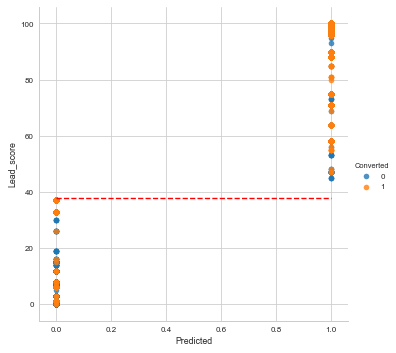

In [109]:
plt.figure()
sns.lmplot('Predicted', 'Lead_score', data=leads_pred_final, hue='Converted', fit_reg=False)
horiz_line_data = np.array([38 for i in range(0,2,1)])
plt.plot([0,1], horiz_line_data, 'r--')
plt.show()

#### This model for given dataset gives a distinct decision boundary and has been illustrated above. Further the above also shows the efficacy of the model 

# Conclusion
- Given dataset has **lot of missing data - sound judgement** on dropping, imputing & capping is essential
- There are considerable number of **data quality issues which call for evaluation of data gathering process and implementing data validations in process** - ex: City - Country combination, Lead Souce Values
- Categorical Variables have lot of options, often leading to mixed signals / diverse values. Should be decreased wherever possible
- Sales provided information is extremely rich, however its impact is lost due to considerable unavailable data
- **Numerical information available in data is of very less use** for model building - i.e not a significant driver of Conversion
- **Threshold could be tweaked based on the business goal**. An inflection point, where abruptly sensitivity changes
- Model has been built with considerable high ROC-AUC which signifies the **skill in the model to predict accurately**
- Overall Data has **ample amount of information dimensions allowing target variable 'Converted' to be predicted with good accuracy levels**